In [1]:
# pip install matplotlib numpy

CH1. Systems of Linear Equations and Matrices

Contents

1.1 Introduction to Systems of Linear Equations

System: 여러 개의 서로 관련된 방정식들로 구성된 집합을 의미

# homogeneous linear equation

* homogeneous가 쓰인 이유: 모든 항이 같은 "차수(degree)"를 가지기 때문.
-> 특징: 항상 해로 x=0, y=0과 같은 trivial solution이 존재.
-> 변수들끼리만 엮여 있어서 구조적으로 해의 집합이 벡터 공간이 되는 장점.

# system of linear equations(linear system) : A finite set of linear equation

* "Every system of linear equations has zero, one, or infinitely many solutions. There are no other possibilities."


* Augmented matrix & elementary row operations

Augmented Matrix : 계수 행렬(coefficient matrix)에 오른쪽 상수항(Constant column)을 덧붙인 형태

-> An augmented matrix is a matrix that includes both the coefficients and the constants of a system of equations. It is used to solve systems using matrix methods like Gaussian elimination.

Elementary Row Operations
1. Row swapping(행 교환)
2. Scalar multiplication(행의 스칼라 배)
3. Row addition(행 더하기)

-> 행렬을 다룰 때 사용할 수 있는 세가지 기본적인 행 변환 규칙

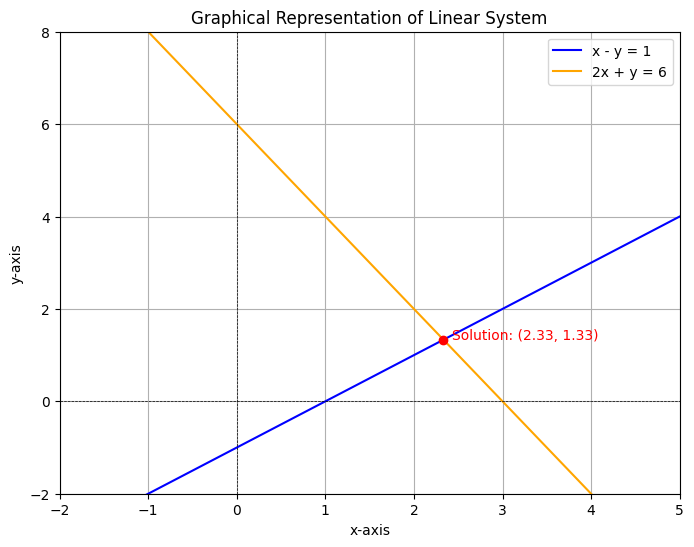

In [2]:
# Tech Example 1

# example 2: A Linear System with One Solution
# x - y = 1 
# 2x + y = 6

import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the equations
A = np.array([[1, -1], [2, 1]])
b = np.array([1, 6])

# Solve the system of equations
solution = np.linalg.solve(A, b)
x_sol, y_sol = solution

# x range for plotting
x_range = np.linspace(-2, 5, 400)

# Calculate y values for each equation
y1 = x_range - 1
y2 = 6 - 2 * x_range

# Plot the lines
plt.figure(figsize=(8, 6)) # 인치 사이즈 크기
plt.plot(x_range, y1, label='x - y = 1', color='blue') # 그래프 그리기
plt.plot(x_range, y2, label='2x + y = 6', color='orange')
plt.scatter(x_sol, y_sol, color='red', zorder=5)  # Solution point (zorder클수록 더 위에 그림)

# 점과 겹치지 않게, 약간 오른쪽에 텍스트 표시 / :.2f는 소수점 둘째자리까지 반올림해서 표시
plt.text(x_sol + 0.1, y_sol, f'Solution: ({x_sol:.2f}, {y_sol:.2f})', fontsize=10, color='red')

plt.title('Graphical Representation of Linear System')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axhline(0, color='black',linewidth=0.5, ls='--') # horizontal line at y=0
plt.axvline(0, color='black',linewidth=0.5, ls='--') # vertical line at x=0
plt.grid() # 격자무늬
plt.legend() # label='...'로 지정한 것들을 모아서 범례(legend)로 표시
plt.xlim(-2, 5) # x축 범위(viewing range)
plt.ylim(-2, 8)
plt.show() # 실제로 보여주는 명령어


No solution exists for the system of equations: Singular matrix


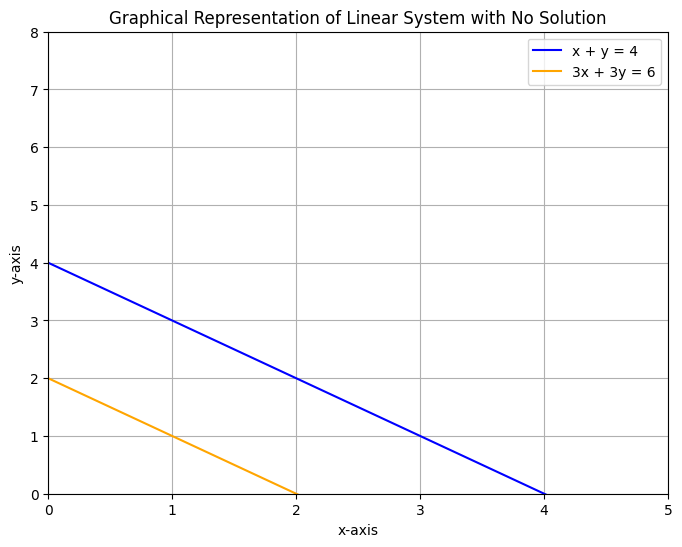

In [10]:
# example 3: A Linear System with No Solutions
# x + y = 4
# 3x + 3y = 6

# In this case, the second equation is a multiple of the first, indicating that they represent the same line.
A_no_solution = np.array([[1, 1], [3, 3]])
b_no_solution = np.array([4, 6])
# Attempt to solve the system of equations
try:
    solution_no_solution = np.linalg.solve(A_no_solution, b_no_solution)
except np.linalg.LinAlgError as e:
    print("No solution exists for the system of equations:", e)     

# The above code will raise an error because the system is inconsistent (parallel lines → no solution).
# To visualize this, we can plot the lines.
# Define the coefficients of the equations for no solution case
y1_no_solution = 4 - x_range
y2_no_solution = (6 - 3 * x_range) / 3

# Plot the lines for no solution case
plt.figure(figsize=(8, 6)) # 인치 사이즈 크기
plt.plot(x_range, y1_no_solution, label='x + y = 4', color='blue')
plt.plot(x_range, y2_no_solution, label='3x + 3y = 6', color='orange')
plt.axhline(0, color='black', linewidth=0.5, ls='--') # horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--') # vertical line at x=0
plt.grid()

plt.title('Graphical Representation of Linear System with No Solution')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.xlim(0, 5) # x축 범위(viewing range)
plt.ylim(0, 8)
plt.show() # 실제로 보여주는 명령어


Infinitely many solutions exist for the system of equations: Singular matrix


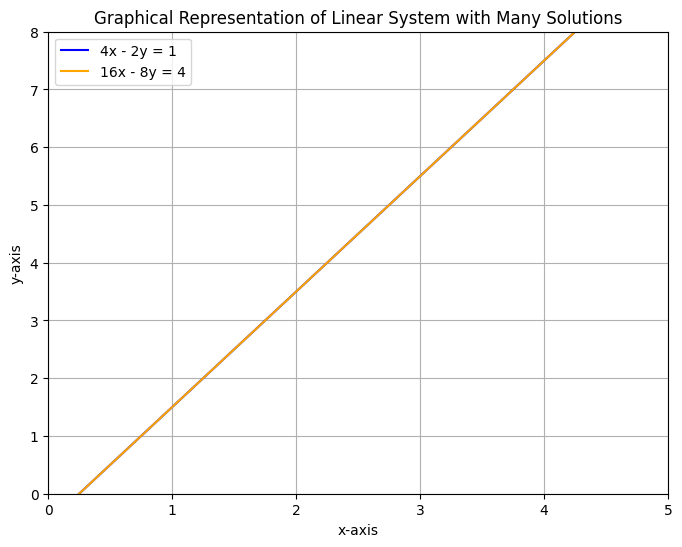

In [11]:
# example 4: A Linear System with Infinitely many Solutions
# 4x - 2y = 1
# 16x - 8y = 4

# In this case, the second equation is a multiple of the first, indicating that they represent the same line.
A = np.array([[4, -2], [16, -8]])
b = np.array([1, 4])
# Attempt to solve the system of equations
try:
    solution_no_solution = np.linalg.solve(A_no_solution, b_no_solution)
except np.linalg.LinAlgError as e:
    print("Infinitely many solutions exist for the system of equations:", e)     

y1 = (-1 + 4*x_range) / 2
y2 = (-4 + 16*x_range) / 8

# Plot the lines for no solution case
plt.figure(figsize=(8, 6)) # 인치 사이즈 크기
plt.plot(x_range, y1, label='4x - 2y = 1', color='blue')
plt.plot(x_range, y2, label='16x - 8y = 4', color='orange')
plt.axhline(0, color='black', linewidth=0.5, ls='--') # horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--') # vertical line at x=0
plt.grid()

plt.title('Graphical Representation of Linear System with Many Solutions')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.xlim(0, 5) # x축 범위(viewing range)
plt.ylim(0, 8)
plt.show() # 실제로 보여주는 명령어


# Singular Matrix관련 에러 설명

# A singular matrix is a square matrix that does not have an inverse. 
# This occurs when the rows (or columns) of the matrix are linearly dependent, 
# meaning one row (or column) can be expressed as a linear combination of others.
# In the context of solving linear equations, if the coefficient matrix is singular, 
# it indicates that the system of equations does not have a unique solution. This can happen in two scenarios:
# 1. The system has no solutions (inconsistent).
# 2. The system has infinitely many solutions (dependent equations).

문제21

![Exam 21](../assets/ch01_exam21.png)

증명을 하는 방법
1. 각 points는 curve 위의 점이므로 대입
y1 = a*x1^2 + b*x1 + c
y2 = a*x2^2 + b*x2 + c
y3 = a*x3^2 + b*x3 + c

2. a,b,c를 unknowns로 생각해서 augmented matrix 를 나타내자.

3. 제시된 matrix가 augmented matrix이므로 이를 풀면 해가 a,b,c가 된다.


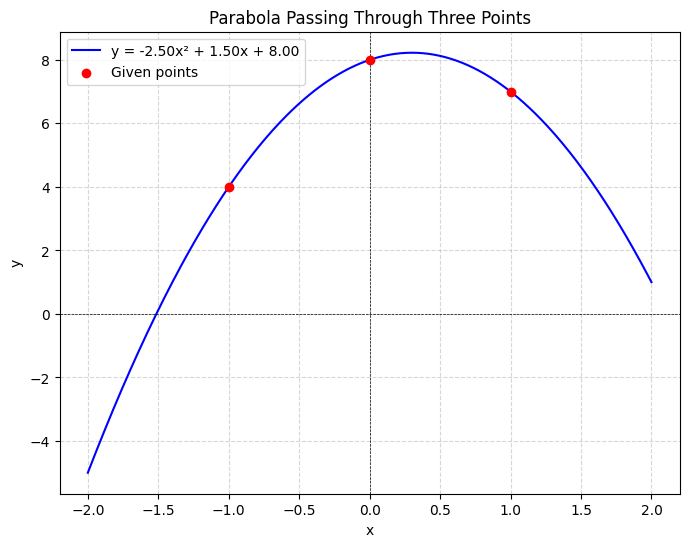

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 연립방정식 구성
A = np.array([
    [1, -1, 1],
    [0,  0, 1],
    [1,  1, 1]
])
b = np.array([4, 8, 7])

# 계수 구하기
a_sol, b_sol, c_sol = np.linalg.solve(A, b)

# 구한 2차 함수
def parabola(x):
    return a_sol * x**2 + b_sol * x + c_sol

# x 범위 설정
x_vals = np.linspace(-2, 2, 400)
y_vals = parabola(x_vals)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=f'y = {a_sol:.2f}x² + {b_sol:.2f}x + {c_sol:.2f}', color='blue')
plt.scatter([-1, 0, 1], [4, 8, 7], color='red', zorder=5, label='Given points')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Parabola Passing Through Three Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
